<a href="https://colab.research.google.com/github/divyalaldinani/Deep-Learning-in-TensorFlow/blob/main/04_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Transfer learning:
leveraging a working model's existing architecture and learned patterns for our own problem

> use/make use of existing trained model proven to work on a problem similar to ours.
<br>
> learned patterns on similar data to our own, then we can adapt those patterns to our own dataset.

In [138]:
pip install tensorflow==2.14.0 tensorflow-hub==0.15.0 keras==2.14.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 31.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-hub
    Found existing installation: tensorflow-hub 0.12.0
    Uninstalling tensorflow-hub-0.12.0:
      Successfully uninstalled tensorflow-hub-0.12.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: google-auth-oauthlib
    Found exi

In [23]:
#are we using a GPU
!nvidia-smi

Mon Jan  6 15:45:15 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [24]:
# downloading and visualizing data -> https://www.kaggle.com/datasets/dansbecker/food-101 -> 10 categories -> each category has 10% of org data as present in actual

import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

zip_ref = zipfile.ZipFile('10_food_classes_10_percent.zip')
zip_ref.extractall()
zip_ref.close()

--2025-01-06 15:45:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.207, 108.177.98.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.11’

10_food_classes_10_ 100%[===================>] 160.74M   239MB/s    in 0.7s    

2025-01-06 15:45:18 (239 MB/s) - ‘10_food_classes_10_percent.zip.11’ saved [168546183/168546183]



In [25]:
# inspecting the data

import os

for dirpath, dirnames, filenames in os.walk('10_food_classes_10_percent'):
    print(f"{len(dirnames)} dirs and {len(filenames)} files are present in {dirpath}")

2 dirs and 0 files are present in 10_food_classes_10_percent
10 dirs and 0 files are present in 10_food_classes_10_percent/train
0 dirs and 75 files are present in 10_food_classes_10_percent/train/ice_cream
0 dirs and 75 files are present in 10_food_classes_10_percent/train/chicken_wings
0 dirs and 75 files are present in 10_food_classes_10_percent/train/chicken_curry
0 dirs and 75 files are present in 10_food_classes_10_percent/train/fried_rice
0 dirs and 75 files are present in 10_food_classes_10_percent/train/ramen
0 dirs and 75 files are present in 10_food_classes_10_percent/train/hamburger
0 dirs and 75 files are present in 10_food_classes_10_percent/train/steak
0 dirs and 75 files are present in 10_food_classes_10_percent/train/pizza
0 dirs and 75 files are present in 10_food_classes_10_percent/train/sushi
0 dirs and 75 files are present in 10_food_classes_10_percent/train/grilled_salmon
10 dirs and 0 files are present in 10_food_classes_10_percent/test
0 dirs and 250 files are p

test data is same but train data is 10% of original

## *Creating data loaders*
**using ```ImageDataGenerator``` to load in our images in batches**
italicized text



In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = '10_food_classes_10_percent/train/'
test_dir = '10_food_classes_10_percent/test/'


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMAGE_SHAPE,
                                               batch_size=BATCH_SIZE,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMAGE_SHAPE,
                                             batch_size= BATCH_SIZE,
                                             class_mode = 'categorical')

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## *Setting up callbacks(things to run during our model trains)*

Callbacks are extra functionality to be executed during or after model training.
Popular callbacks:
* Tracking experiments with TensorBoard callback
* Model checkpoint with ModelCheckpoint callback
* Stopping a model from training( as no progress in accuracy) with EarlyStopping Callback

In [27]:
# from re import template
import datetime
import tensorflow as tf

def create_tb_callback(dir_name, exp_name):
    log_dir = dir_name + '/' + exp_name + '/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir)
    print(f"Saving tensorboard log files to: {log_dir}")
    return tensorboard_callback

We can also save TensorBoard log( model training metrics) in the log_dir directory.

##Creating models using TensorFlow Hub

Accessing pretrained models fron TensorFlow Hub.
[here](https://tfhub.dev)

In [28]:
# efficientnet_url = "https://www.kaggle.com/models/google/efficientnet-v2/TensorFlow2/imagenet1k-b0-feature-vector/2"

efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [29]:
import tensorflow as tf
import tensorflow_hub as hub
import tf_keras

from tensorflow.keras import layers

In [30]:
# pip install tensorflow==2.15.0 tensorflow-hub keras==2.15.0

In [31]:
def create_model(model_url):
  """
  doc string, wohhoo!!
  """
  model = tf.keras.Sequential([
      hub.KerasLayer(model_url,
                    trainable=False, # freeze the underlying patterns
                    name='feature_extraction_layer',
                    input_shape=IMAGE_SHAPE+(3,)), # define the input image shape

    layers.Dense(10, activation='softmax') # create our own output layer
  ])

  return model

In [38]:
efficientnet_model = create_model(efficientnet_url)

efficientnet_model.compile(loss = 'categorical_crossentropy',
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

In [39]:
# lidat

In [40]:
efficientnet_history = efficientnet_model.fit(train_data,
                                              validation_data=test_data,
                                              batch_size=BATCH_SIZE,
                                              epochs=10,
                                              callbacks=[create_tb_callback(dir_name="tensorflow_hub", exp_name="efficientnetb0-1")])

Saving tensorboard log files to: tensorflow_hub/efficientnetb0-1/20250106-155407
Epoch 1/10
24/24 [==============================] - 193s 8s/step - loss: 1.8449 - accuracy: 0.4307 - val_loss: 1.3027 - val_accuracy: 0.7148
Epoch 2/10
24/24 [==============================] - 180s 8s/step - loss: 1.0802 - accuracy: 0.7520 - val_loss: 0.8712 - val_accuracy: 0.8120
Epoch 3/10
24/24 [==============================] - 179s 8s/step - loss: 0.7690 - accuracy: 0.8293 - val_loss: 0.7005 - val_accuracy: 0.8376
Epoch 4/10
24/24 [==============================] - 181s 8s/step - loss: 0.6213 - accuracy: 0.8667 - val_loss: 0.6122 - val_accuracy: 0.8544
Epoch 5/10
24/24 [==============================] - 178s 8s/step - loss: 0.5216 - accuracy: 0.8907 - val_loss: 0.5576 - val_accuracy: 0.8600
Epoch 6/10
24/24 [==============================] - 180s 8s/step - loss: 0.4501 - accuracy: 0.9107 - val_loss: 0.5218 - val_accuracy: 0.8608
Epoch 7/10
24/24 [==============================] - 179s 8s/step - loss: 

2.14.0
0.15.0


In [58]:
import matplotlib.image as mpimg

img = mpimg.imread('/content/10_food_classes_10_percent/test/ice_cream/130043.jpg')
# efficientnet_model.predict(img)
img = tf.image.resize(img, (224, 224))
img = tf.convert_to_tensor(img)
img = tf.expand_dims(img, axis=0)
img.shape

TensorShape([1, 224, 224, 3])

In [59]:
# pip install tensorflow tensorflow-hub --upgrade
img /= 255.
pred = efficientnet_model.predict(img)

1/1 [==============================] - 0s 64ms/step


In [60]:
class_names = ['chicken_curry', 'chicken_wings', 'fried_rice', 'griled_salmon', 'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi']

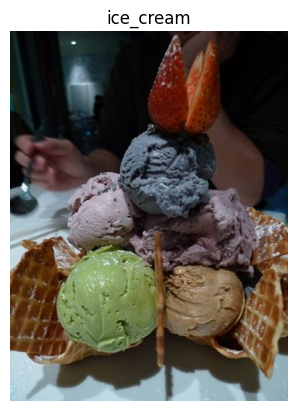

In [62]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(mpimg.imread('/content/10_food_classes_10_percent/test/ice_cream/130043.jpg'))
plt.title(class_names[np.argmax(pred)])
plt.axis(False)
plt.show()

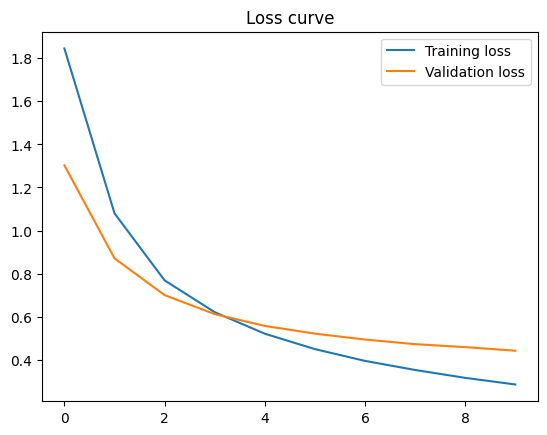

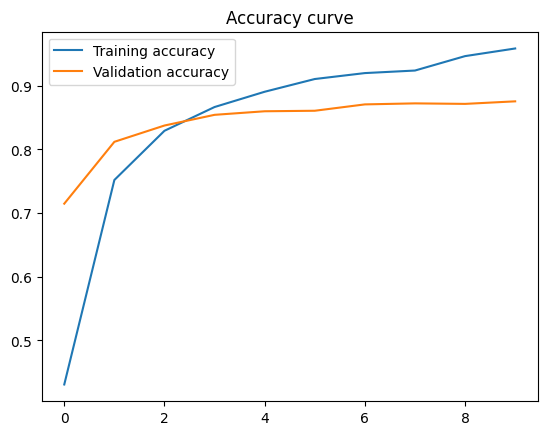

In [70]:
def plot_loss_curves(history):
    epochs=range(len(history.history['loss']))
    plt.plot( epochs, history.history['loss'], label = 'Training loss')
    plt.plot( epochs, history.history['val_loss'], label = 'Validation loss')
    plt.legend()
    plt.title('Loss curve')
    plt.show()

    plt.plot(epochs, history.history['accuracy'], label = 'Training accuracy')
    plt.plot(epochs, history.history['val_accuracy'], label = 'Validation accuracy')
    plt.legend()
    plt.title('Accuracy curve')
    plt.show()

plot_loss_curves(efficientnet_history)